In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier

In [14]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from sklearn.model_selection import cross_val_score

In [29]:
from sklearn import tree
print('imported')

imported


In [2]:
tax_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv" )

In [12]:
tax_data.head(5)

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


In [11]:
tax_data.info()
tax_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      803 non-null    int64 
 1   HHI             803 non-null    int64 
 2   HHDL            803 non-null    int64 
 3   Married         803 non-null    int64 
 4   CollegGrads     803 non-null    int64 
 5   AHHAge          803 non-null    int64 
 6   Cars            803 non-null    int64 
 7   Filed in 2017   803 non-null    int64 
 8   Filed in 2016   803 non-null    int64 
 9   Filed in 2015   803 non-null    int64 
 10  PoliticalParty  803 non-null    object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,502.241594,155402.688667,-15351.252802,0.971357,2.607721,60.559153,2.435866,0.506849,0.509340,0.516812
std,288.460068,86788.153213,595184.302049,0.803935,1.675492,25.071219,1.703542,0.500265,0.500224,0.500029
min,1.000000,185.000000,-999994.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,254.500000,82373.000000,-516765.000000,0.000000,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000
50%,501.000000,156542.000000,-24440.000000,1.000000,3.000000,60.000000,2.000000,1.000000,1.000000,1.000000
75%,754.500000,230772.000000,518135.500000,2.000000,4.000000,82.000000,4.000000,1.000000,1.000000,1.000000
max,1004.000000,299374.000000,999628.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.000000


In [31]:
numeric_features = tax_data.select_dtypes(include=[np.number])

numeric_features.columns

Index(['Unnamed: 0', 'HHI', 'HHDL', 'Married', 'CollegGrads', 'AHHAge', 'Cars',
       'Filed in 2017', 'Filed in 2016', 'Filed in 2015'],
      dtype='object')

In [29]:
categorical_features = tax_data.select_dtypes(include=object)

categorical_features.columns

Index(['PoliticalParty'], dtype='object')

there are 0 NAs in the dataset
803 rows
10 columns, all integers except political party

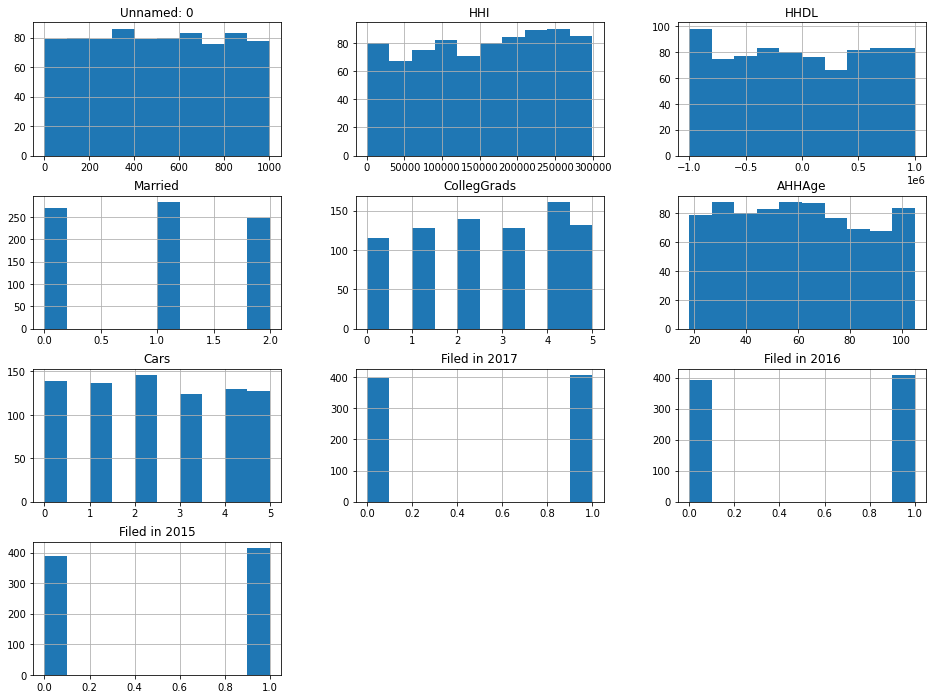

In [20]:
tax_data.hist(bins=10, figsize=(16,12))
plt.show()

Dataset is balanced and have equal data across all classes

<AxesSubplot:>

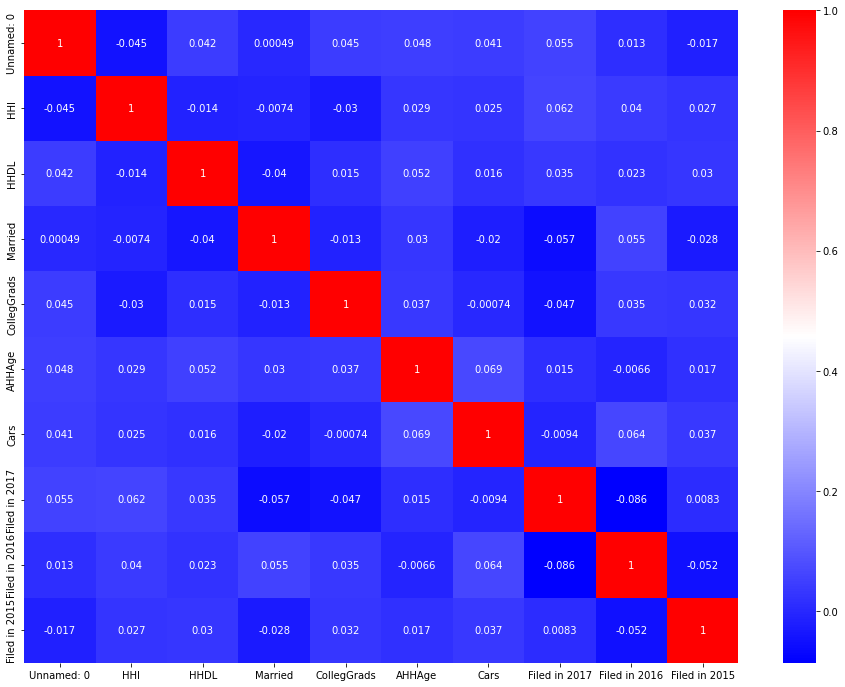

In [21]:
plt.figure(figsize=(16, 12))
sns.heatmap(tax_data.corr(), cmap='bwr', annot=True)

Seems like there's low correlations between variables

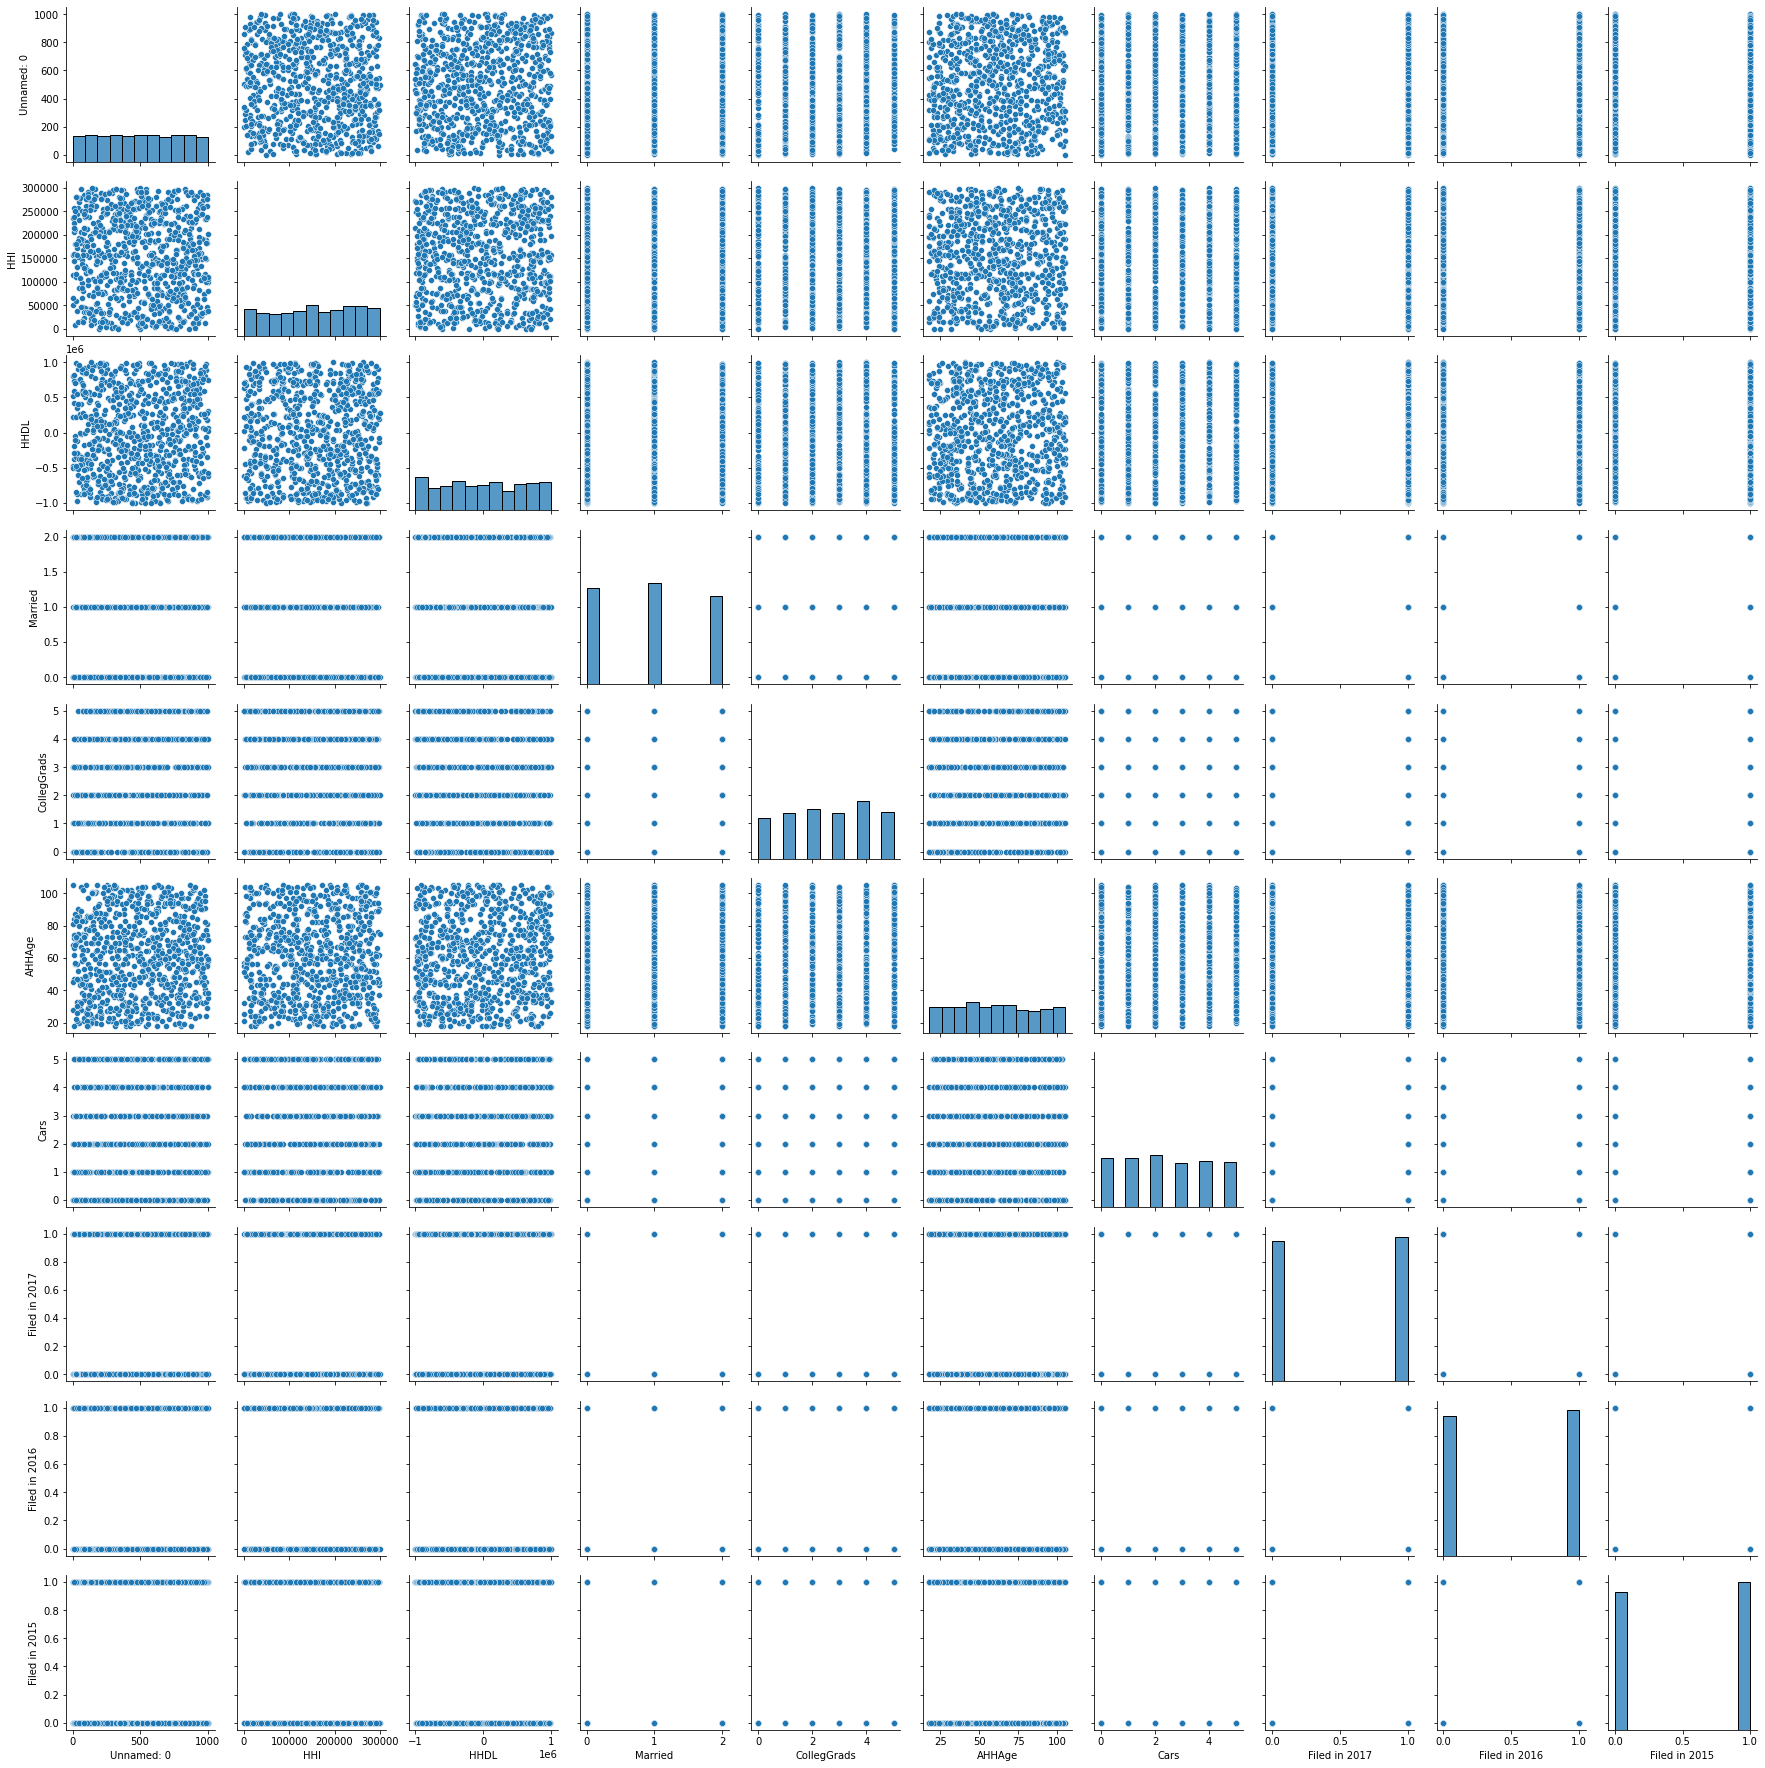

In [35]:
sns.pairplot(tax_data)

In [6]:
taxdata = tax_data.iloc[:, 1:]
taxdata.head(5)

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,183414,-12402,1,2,28,1,0,0,1,Democrat
1,129786,700251,2,5,63,3,0,0,0,Republican
2,268343,493411,2,4,44,1,1,0,1,Independent
3,290506,-433408,1,1,28,5,1,0,1,Republican
4,90108,907135,1,3,57,5,1,1,0,Democrat


In [7]:
# apply the min-max scaling in Pandas using the .min() and .max() methods
def min_max_scaling(df):
    # copy the dataframe
    df_norm = taxdata.copy()
    # apply min-max scaling
    for column in df_norm.select_dtypes(include='number'):
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
    
# call the min_max_scaling function
taxdata_normalized = min_max_scaling(taxdata)

taxdata_normalized

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,0.612419,0.493889,0.5,0.4,0.114943,0.2,0.0,0.0,1.0,Democrat
1,0.433174,0.850283,1.0,1.0,0.517241,0.6,0.0,0.0,0.0,Republican
2,0.896283,0.746844,1.0,0.8,0.298851,0.2,1.0,0.0,1.0,Independent
3,0.970360,0.283347,0.5,0.2,0.114943,1.0,1.0,0.0,1.0,Republican
4,0.300556,0.953745,0.5,0.6,0.448276,1.0,1.0,1.0,0.0,Democrat
...,...,...,...,...,...,...,...,...,...,...
798,0.511780,0.986138,0.0,0.2,0.931034,1.0,1.0,0.0,0.0,Democrat
799,0.456123,0.407766,0.5,0.4,0.149425,0.6,1.0,0.0,0.0,Democrat
800,0.170063,0.049875,0.5,0.2,0.563218,0.8,0.0,0.0,0.0,Democrat
801,0.412903,0.474363,1.0,0.0,0.057471,0.8,0.0,1.0,1.0,Republican


label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
taxdata_normalized['PoliticalParty'] = le.fit_transform(taxdata_normalized['PoliticalParty'])
df = taxdata_normalized
df.head(5)

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,0.612419,0.493889,0.5,0.4,0.114943,0.2,0.0,0.0,1.0,0
1,0.433174,0.850283,1.0,1.0,0.517241,0.6,0.0,0.0,0.0,2
2,0.896283,0.746844,1.0,0.8,0.298851,0.2,1.0,0.0,1.0,1
3,0.970360,0.283347,0.5,0.2,0.114943,1.0,1.0,0.0,1.0,2
4,0.300556,0.953745,0.5,0.6,0.448276,1.0,1.0,1.0,0.0,0


In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(taxdata['PoliticalParty'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Democrat': 0, 'Independent': 1, 'Republican': 2}


In [87]:
# Import the Logistic Regression class from sklear.linear_model
from sklearn.linear_model import LogisticRegression

In [10]:
X_train = df.loc[:, df.columns != 'PoliticalParty'] # feature columns
y_train = df['PoliticalParty'] # target column
X_train.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,0.612419,0.493889,0.5,0.4,0.114943,0.2,0.0,0.0,1.0
1,0.433174,0.850283,1.0,1.0,0.517241,0.6,0.0,0.0,0.0
2,0.896283,0.746844,1.0,0.8,0.298851,0.2,1.0,0.0,1.0
3,0.970360,0.283347,0.5,0.2,0.114943,1.0,1.0,0.0,1.0
4,0.300556,0.953745,0.5,0.6,0.448276,1.0,1.0,1.0,0.0


In [11]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv')

In [12]:
testdf = test_data.iloc[:, 1:]
testdf.head()
X_test = testdf

In [115]:
df.PoliticalParty.unique()

array([0, 2, 1])

In [162]:
df.PoliticalParty.value_counts() # training dataset

0    269
1    269
2    265
Name: PoliticalParty, dtype: int64

Model 1: Trying out Decision Tree Classifier

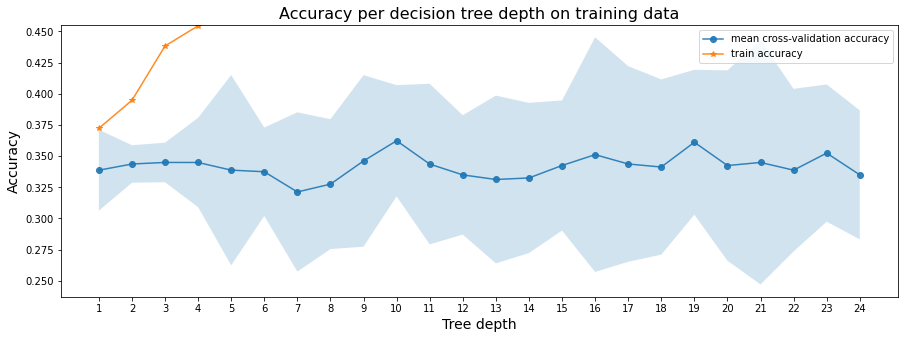

In [144]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [145]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


The depth-10 tree achieves the best mean cross-validation accuracy 36.23447 +/- 2.232% on training dataset


In [48]:
dtree_model = DecisionTreeClassifier(criterion="gini", max_depth = 10, min_samples_leaf=2).fit(X_train, y_train)

NameError: name 'DecisionTreeClassifier' is not defined

Feature: 0, Score: 0.23077
Feature: 1, Score: 0.29908
Feature: 2, Score: 0.06071
Feature: 3, Score: 0.03858
Feature: 4, Score: 0.16714
Feature: 5, Score: 0.08436
Feature: 6, Score: 0.04919
Feature: 7, Score: 0.02073
Feature: 8, Score: 0.04943


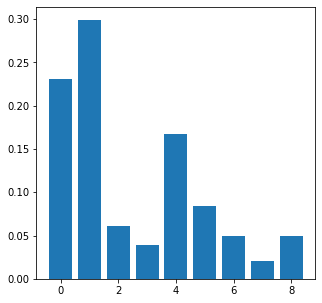

In [199]:
importance = dtree_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

HHI, HHDL, and AHHAge are given quite high importance by decision tree classifier

In [237]:
dtree_predictions = dtree_model.predict(X_test)

In [238]:
dtree_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0])

Attempt 2: Trying out XGBoost

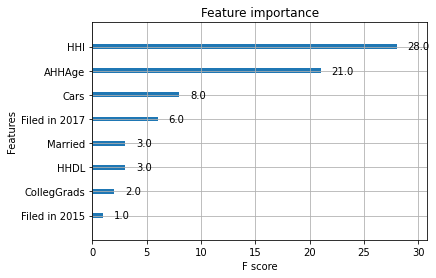

In [197]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 9)
xg_reg.fit(X_train,y_train)
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [230]:
preds = xg_reg.predict(X_test)

In [232]:
target = le.inverse_transform(preds)

array(['Democrat', 'Republican', 'Democrat', 'Democrat', 'Republican',
       'Democrat', 'Democrat', 'Democrat', 'Republican', 'Democrat',
       'Republican', 'Republican', 'Democrat', 'Democrat', 'Democrat',
       'Republican', 'Independent', 'Republican', 'Republican',
       'Republican', 'Democrat', 'Republican', 'Independent', 'Democrat',
       'Republican', 'Democrat', 'Democrat', 'Democrat', 'Republican',
       'Republican', 'Republican', 'Republican', 'Republican',
       'Republican', 'Independent', 'Republican', 'Republican',
       'Democrat', 'Republican', 'Republican', 'Republican', 'Democrat',
       'Democrat', 'Republican', 'Democrat', 'Democrat', 'Democrat',
       'Democrat', 'Democrat', 'Democrat', 'Independent', 'Democrat',
       'Republican', 'Republican', 'Republican', 'Democrat', 'Republican',
       'Independent', 'Republican', 'Democrat', 'Democrat', 'Democrat',
       'Republican', 'Republican', 'Republican', 'Democrat', 'Democrat',
       'Democrat', 'R

In [233]:
res = pd.DataFrame(target)
res.index = X_test.index 
res.columns = ["prediction"]
res.to_csv("prediction_results.csv", index = False)  

# Score = 34

Model 3: Bagging

In [18]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1, verbose=1)
bagging_classifier.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


BaggingClassifier(random_state=1, verbose=1)

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot

In [72]:
model = bagging_classifier
X = X_train
y = y_train

# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [5,7,8,9,10]
	for n in n_trees:
		models[str(n)] = BaggingClassifier(n_estimators=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()

>5 0.364 (0.050)
>7 0.357 (0.063)
>8 0.359 (0.054)
>9 0.365 (0.056)
>10 0.346 (0.070)


In [73]:
# Find max_samples number
model = bagging_classifier
X = X_train
y = y_train

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore ratios from 10% to 100% in 10% increments
	for i in np.arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		models[key] = BaggingClassifier(max_samples=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>0.1 0.325 (0.053)
>0.2 0.347 (0.062)
>0.3 0.337 (0.056)
>0.4 0.345 (0.048)
>0.5 0.351 (0.049)
>0.6 0.341 (0.061)
>0.7 0.350 (0.041)
>0.8 0.362 (0.065)
>0.9 0.359 (0.049)
>1.0 0.345 (0.069)


In [74]:
newbag = BaggingClassifier(n_estimators = 9, max_samples = 0.8, random_state=1, verbose=1)
newbagfit = newbag.fit(X_train,y_train)
newbagpred = newbagfit.predict(X_test)

bagtarget = le.inverse_transform(newbagpred)
bagres = pd.DataFrame(bagtarget)
bagres.index = X_test.index 
bagres.columns = ["prediction"]
bagres.to_csv("prediction_results_bag.csv", index = False)

#Score = 37

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Model 4: Random Forest Classifier

In [15]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

In [88]:
# Find max_samples
model = rf_estimator
X = X_train
y = y_train

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore ratios from 10% to 100% in 10% increments
	for i in np.arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		# set max_samples=None to use 100%
		if i == 1.0:
			i = None
		models[key] = RandomForestClassifier(max_samples=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>0.1 0.354 (0.058)
>0.2 0.353 (0.062)
>0.3 0.354 (0.052)
>0.4 0.367 (0.056)
>0.5 0.349 (0.058)
>0.6 0.347 (0.064)
>0.7 0.353 (0.051)
>0.8 0.354 (0.060)
>0.9 0.349 (0.061)
>1.0 0.360 (0.059)


In [89]:
# Find max_features
model = rf_estimator
X = X_train
y = y_train

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 9
	for i in range(1,10):
		models[str(i)] = RandomForestClassifier(max_features=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.351 (0.049)
>2 0.350 (0.053)
>3 0.361 (0.064)
>4 0.346 (0.056)
>5 0.359 (0.060)
>6 0.366 (0.066)
>7 0.358 (0.056)
>8 0.367 (0.058)
>9 0.360 (0.060)


In [90]:
# Find n_estimators
model = rf_estimator
X = X_train
y = y_train

# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [5,6,7,8,9,10]
	for n in n_trees:
		models[str(n)] = RandomForestClassifier(n_estimators=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>5 0.335 (0.055)
>6 0.353 (0.056)
>7 0.330 (0.052)
>8 0.352 (0.054)
>9 0.351 (0.061)
>10 0.350 (0.056)


In [91]:
# Find max_depth

# get a list of models to evaluate
def get_models():
	models = dict()
	# consider tree depths from 1 to 9 and None=full
	depths = [i for i in range(1,10)] + [None]
	for n in depths:
		models[str(n)] = RandomForestClassifier(max_depth=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.319 (0.055)
>2 0.341 (0.056)
>3 0.327 (0.056)
>4 0.342 (0.056)
>5 0.342 (0.061)
>6 0.339 (0.053)
>7 0.354 (0.064)
>8 0.345 (0.054)
>9 0.356 (0.067)
>None 0.354 (0.061)


In [93]:
newrfmod = RandomForestClassifier(max_samples = 0.4, max_features = 8, n_estimators = 6, max_depth = 9)
newrfmod.fit(X_train, y_train)
newrfpred = newrfmod.predict(X_test)

rftarget = le.inverse_transform(newrfpred)
rfres = pd.DataFrame(rftarget)
rfres.index = X_test.index 
rfres.columns = ["prediction"]
rfres.to_csv("prediction_results_rf.csv", index = False)  

#Score = 28

[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=8; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=9; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=9; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=9; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=9; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=sq

[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=8; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=8; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=9; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=8; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=8; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=sqr

[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=8; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=9; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=9; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=9; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=9; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=9; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=9; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=

In [ ]:
Models tried: 
Decision Trees
Random Forest
Gradient Boosting

Other models I could potentially try: Naive Bayes, k-Nearest Neighbors. 